In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + '/Colab Notebooks/DS_takeHomeTask/conversion rate/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
Roadmap

#Roadmap

1) Load and clean data

2) Visualize data and gain insight

3) Establish ML model

4) Compare with baseline model

5) Feature importance 





In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn.utils import resample
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve,roc_auc_score, auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from collections import OrderedDict

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#1) Load and clean data

In [3]:
df = pd.read_csv(base_dir+'conversion_data.csv')

In [5]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


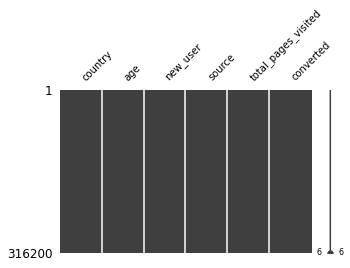

In [6]:
msno.matrix(df,figsize=(5,3),width_ratios=(15,1),fontsize=10);

there is no missing data

In [7]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [8]:
df[df['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


It is abnormal to have these two ages, remove outliners

In [9]:
df = df[df['age']<100]

#2) Visualize data and gain insight

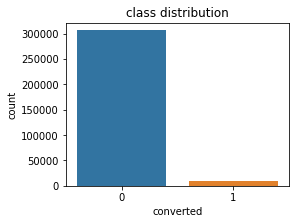

In [10]:
plt.subplots(1,1,figsize=(4,3))
sns.countplot(df['converted']);
plt.title('class distribution');

It is an unbalanced dataset. We cannot directly make any model from it. Acuuracy is not an appropriate metric to evaluate model performance

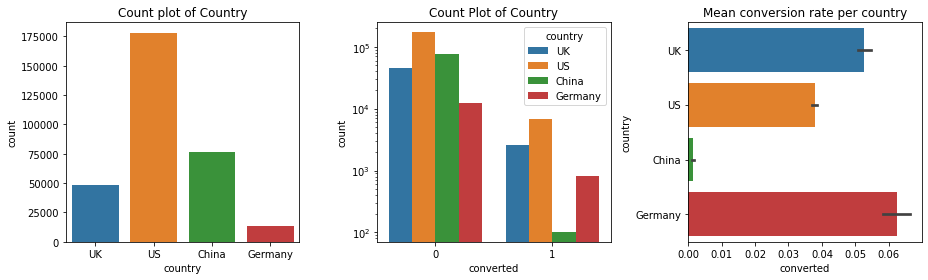

In [11]:
fig, ax = plt.subplots(1,3,figsize=(13,4))
sns.countplot(df['country'],ax=ax[0]);
ax[0].set_title('Count plot of Country',fontsize=12);
sns.countplot(df['converted'],hue=df['country'],ax=ax[1]);
ax[1].set_yscale('log')
ax[1].set_title('Count Plot of Country',fontsize=12)
sns.barplot(df['converted'],df['country'],ax=ax[2]);
ax[2].set_title('Mean conversion rate per country',fontsize=12);

plt.tight_layout()
plt.show()

From these graphs

1) US has the most user but not the highest conversion rate

2) There are many users in China but the conversion rate is very low

3) Germany has low number of users but the highest conversion rate

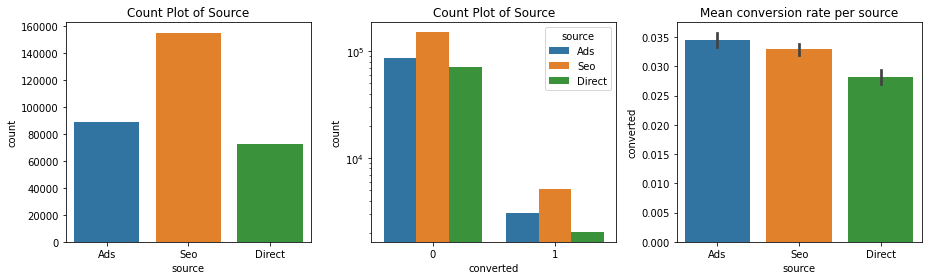

In [12]:
sour = df[['source','converted']].groupby('source').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(13,4))
sns.countplot(df['source'],ax=ax[0]);
ax[0].set_title('Count Plot of Source')
sns.countplot(df['converted'], hue=df['source'],data=df,ax=ax[1]);
ax[1].set_yscale('log')
ax[1].set_title('Count Plot of Source',fontsize=12);
sns.barplot(x='source',y='converted',data=df,ax=ax[2]);
ax[2].set_title('Mean conversion rate per source',fontsize=12);
plt.tight_layout()
plt.show()

1) Most users came to the site via search engine(SEO) and it has the most number fo converted users, but the conversion rate is not the highest

2) Users attracted by Ads have the highest conversion rate

3) Few users came to the site directly (Direct) and the lowest conversion rate

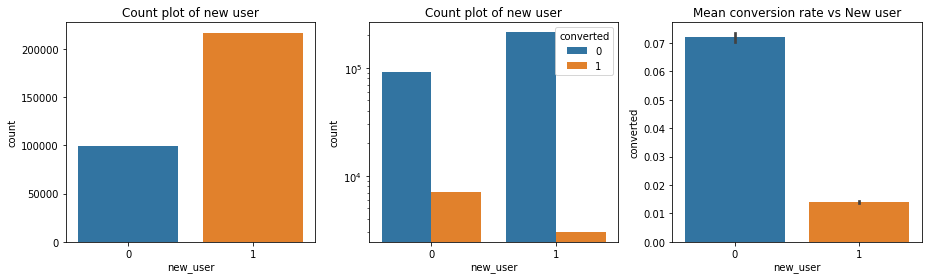

In [13]:
fig, ax = plt.subplots(1,3,figsize=(13,4))
sns.countplot(df['new_user'],ax=ax[0])
ax[0].set_title('Count plot of new user')
sns.countplot(df['new_user'],hue=df['converted'],ax=ax[1])
ax[1].set_yscale('log')
ax[1].set_title('Count plot of new user')
sns.barplot(x='new_user',y='converted',data=df,ax=ax[2])
ax[2].set_title('Mean conversion rate vs New user')
plt.tight_layout()
plt.show()

1) most converted users came from old user


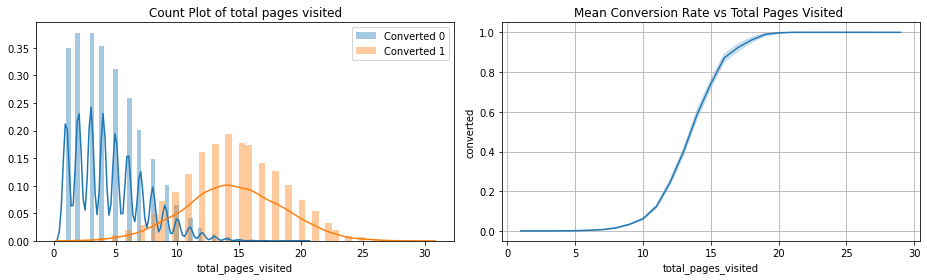

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,4))
con_0 = df[df['converted']==0]['total_pages_visited']
con_1 = df[df['converted']==1]['total_pages_visited']
sns.distplot(con_0,label='Converted 0', ax=ax[0])
sns.distplot(con_1,label='Converted 1', ax=ax[0])
ax[0].legend()
ax[0].set_title('Count Plot of total pages visited',fontsize=12);
sns.lineplot(x='total_pages_visited',y='converted',data=df,ax=ax[1], markers=True, dashes=False);
ax[1].set_title('Mean Conversion Rate vs Total Pages Visited ',fontsize=12);
ax[1].grid(True)
plt.tight_layout()
plt.show()

1) Users who buy something obviously visit more pages to buy something

2) Most of converted users browse more than 15 pages

3) Nonconverted users often visit pages less than 15

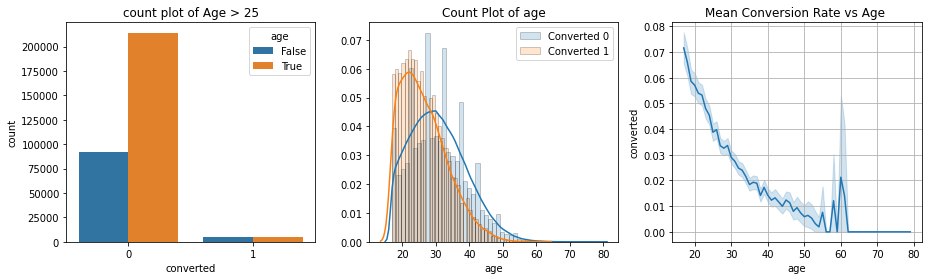

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(13,4))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
sns.countplot(df['converted'],hue=df['age']>25,ax=ax[0])
ax[0].set_title('count plot of Age > 25')
con_0 = df[df['converted']==0]['age']
con_1 = df[df['converted']==1]['age']
sns.distplot(con_0,label='Converted 0', ax=ax[1],hist_kws=hist_kws)
sns.distplot(con_1,label='Converted 1', ax=ax[1],hist_kws=hist_kws)
ax[1].legend()
ax[1].set_title('Count Plot of age',fontsize=12);
sns.lineplot(x='age',y='converted',data=df,ax=ax[2]);
ax[2].set_title('Mean Conversion Rate vs Age ',fontsize=12);
ax[2].grid(True)
plt.tight_layout()
plt.show()

1) the average age of converted users are smaller than that of non-converted users

2) Conversion rate in general decrease with age


#3) Establish Random Forest model

In [18]:
dataset= df.copy()
dataset=pd.get_dummies(dataset, columns=['country','source'], prefix=['country','source'])
dataset = dataset.reset_index()

X_new = dataset[['age', 'new_user', 'total_pages_visited', 'country_China',
       'country_Germany', 'country_UK', 'country_US', 'source_Ads',
       'source_Direct', 'source_Seo']]
y_new = dataset['converted']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3) # 70% training and 30% test

Why use random forest

1) Feature importance helps to analyze and give recommendations

2) Class_weight can be tuned to adjust imbalanced dataset
